# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# import the libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# model for scikit learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score,plot_roc_curve

**Load the data**

In [2]:
df = pd.read_csv("../data/heart-disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Data Exploaration (Exploratory Data Analysis (EDA))**

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


In [7]:
df["age"][df["age"] < 60]

1      37
2      41
3      56
4      57
5      57
       ..
297    59
298    57
299    45
301    57
302    57
Name: age, Length: 213, dtype: int64

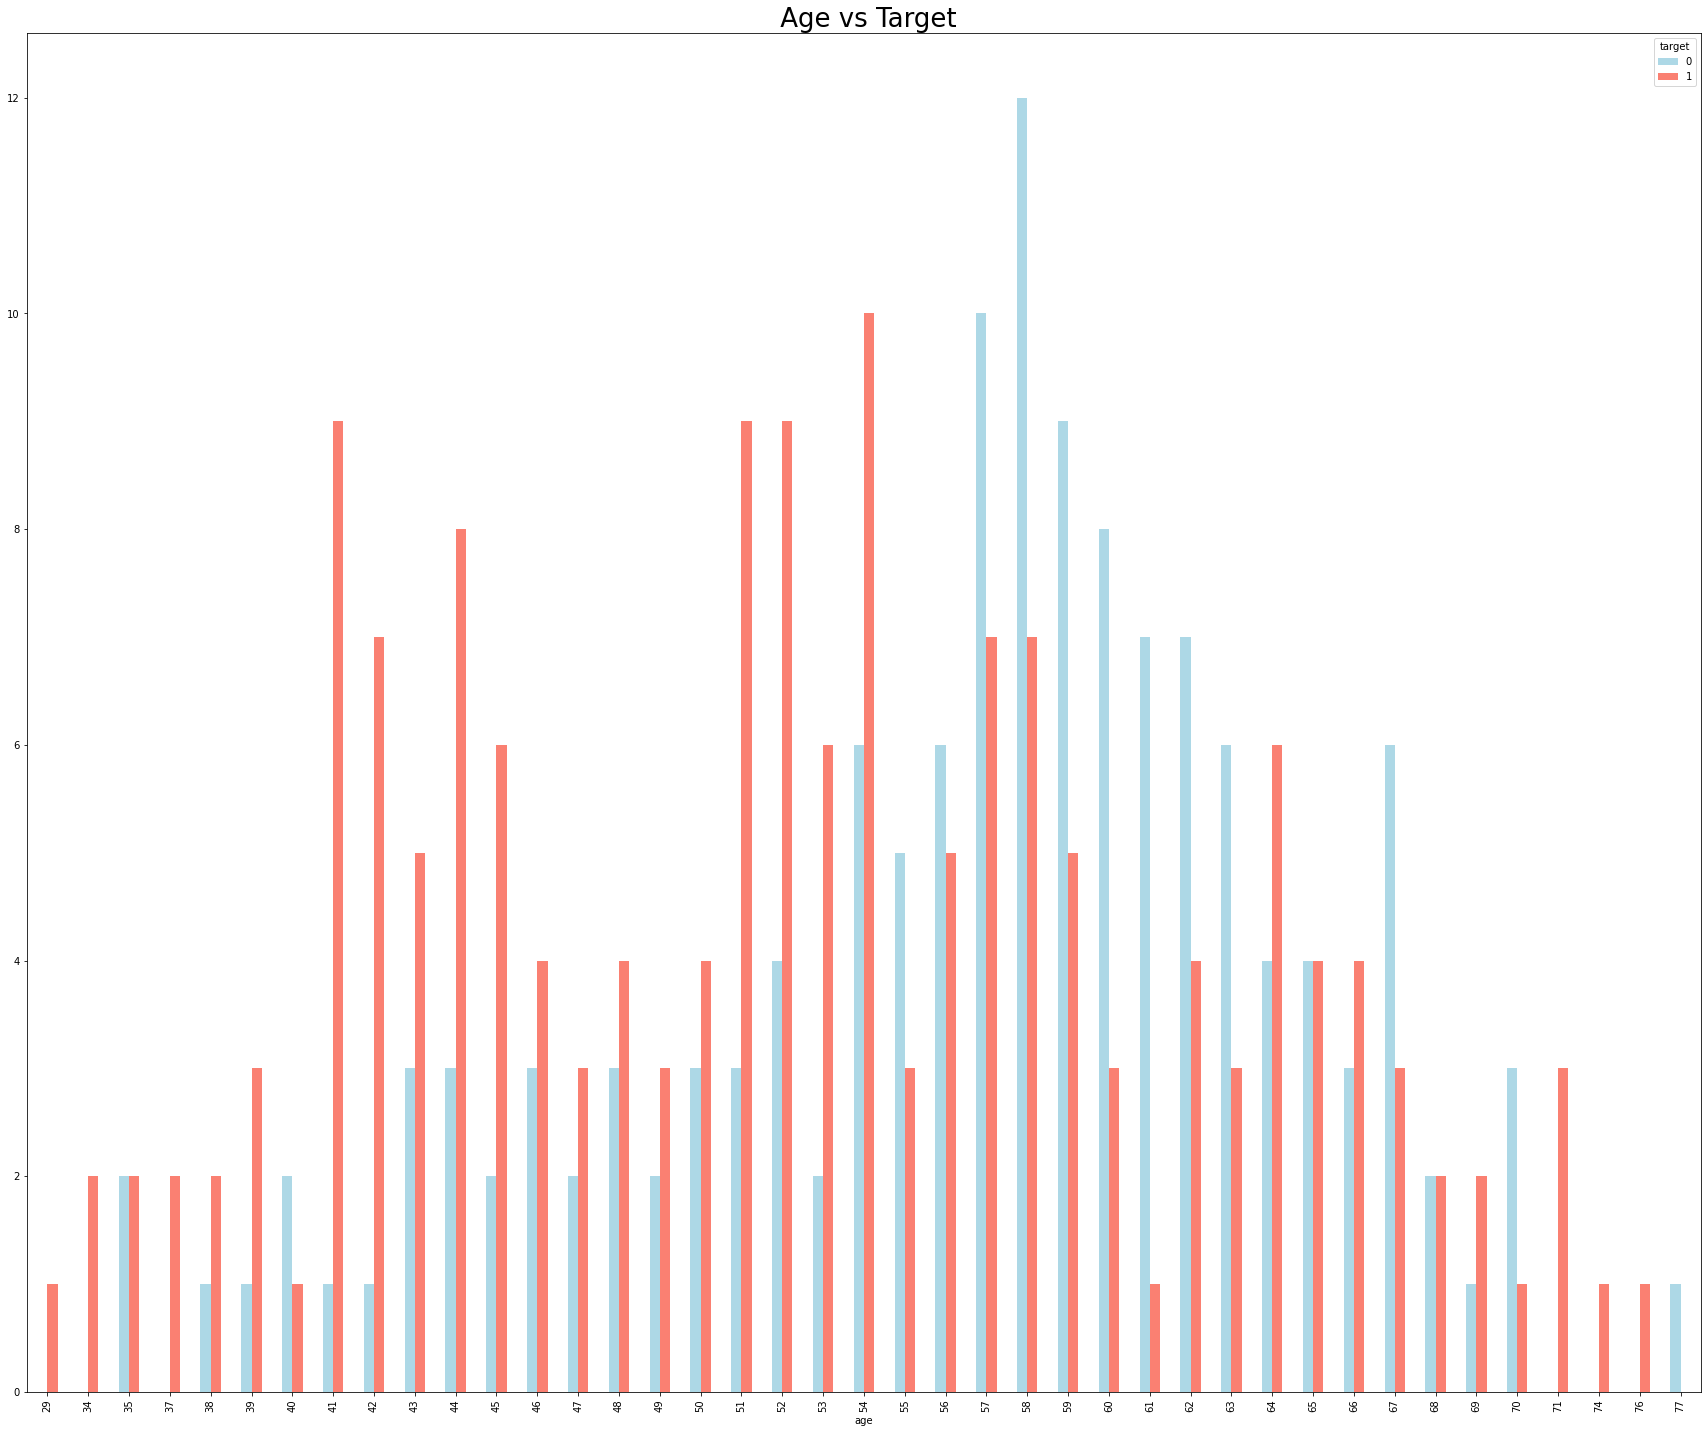

In [8]:
pd.crosstab(df["age"], df.target).plot(kind="bar",
                                    figsize=(30, 25),
                                    color=["lightblue", "salmon"]);
plt.title(" Age vs Target",fontsize=26);

**Let's check the classes available in the target**

In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

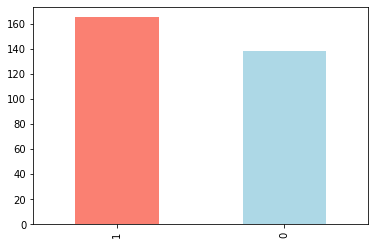

In [10]:
df["target"].value_counts().plot(kind="bar",
                                color=["salmon","lightblue"])

**Let's now find relation between sex and target**
* 0 - Female
* 1 - male

In [11]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

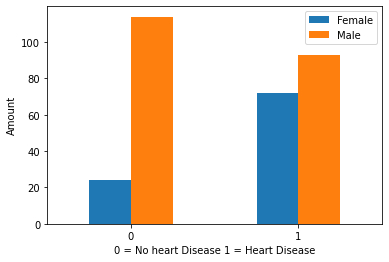

In [12]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.xlabel("0 = No heart Disease 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

**check for the missing values**

In [13]:
df.isna().values.any()

False

In [14]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Let's compare chest pain and target**

cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

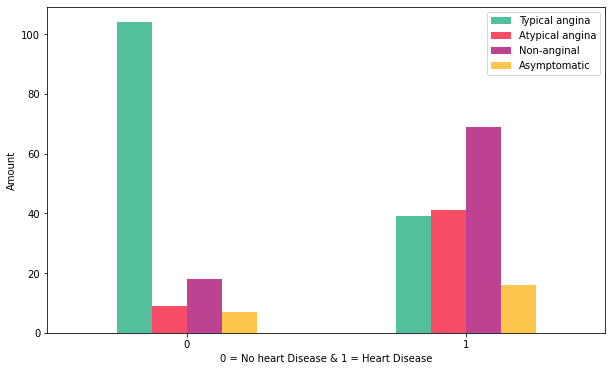

In [19]:
pd.crosstab(df["target"],df["cp"]).plot(kind="bar",
                                       figsize=(10,6),
                                       color=["#53BF9D","#F94C66","#BD4291","#FFC54D"])

plt.xlabel("0 = No heart Disease & 1 = Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Typical angina", "Atypical angina", "Non-anginal", "Asymptomatic"])

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**thalach vs age**

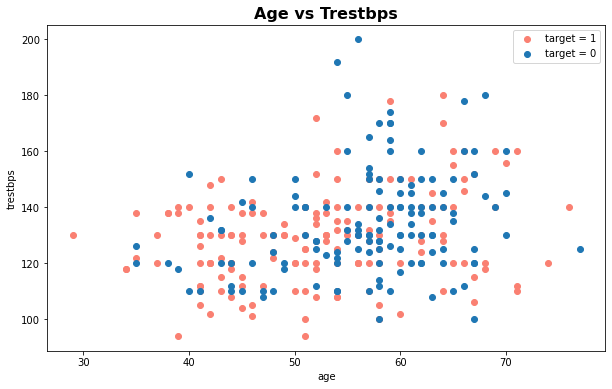

In [21]:
plt.figure(figsize=(10,6))

# positive samples
plt.scatter(df["age"][df["target"] == 1],df["trestbps"][df["target"] == 1],c="salmon")

#negative samples
plt.scatter(df.age[df["target"] == 0],df.trestbps[df["target"] == 0])

# customize
plt.title("Age vs Trestbps",fontsize=16,fontweight="bold")
plt.xlabel("age")
plt.ylabel("trestbps")
plt.legend(["target = 1","target = 0"]);

**now let's look at age and thalach**

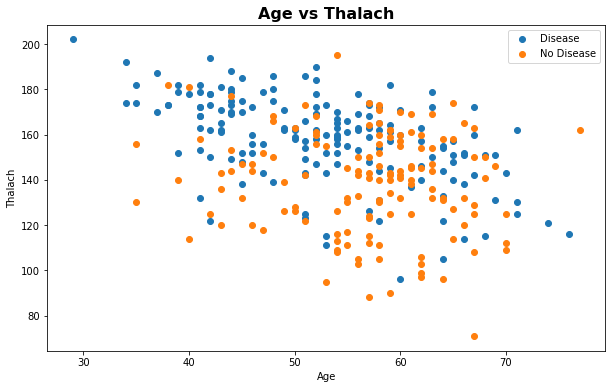

In [22]:
# create figsize
plt.figure(figsize=(10,6))

# create with positive samples
plt.scatter(df.age[df["target"] == 1], df.thalach[df["target"] == 1])

# create with negative samples
plt.scatter(df.age[df["target"] == 0],df.thalach[df["target"] == 0])

#customize the figure
plt.title("Age vs Thalach",fontsize=16,fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease","No Disease"]);

**look at the distriburion of the age**

<AxesSubplot:ylabel='Frequency'>

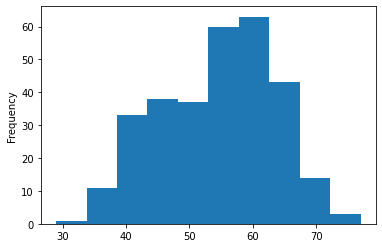

In [23]:
df.age.plot.hist()

In [24]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

**Make a correlation matrix**

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**We can also represent it using the sandmap visualization**

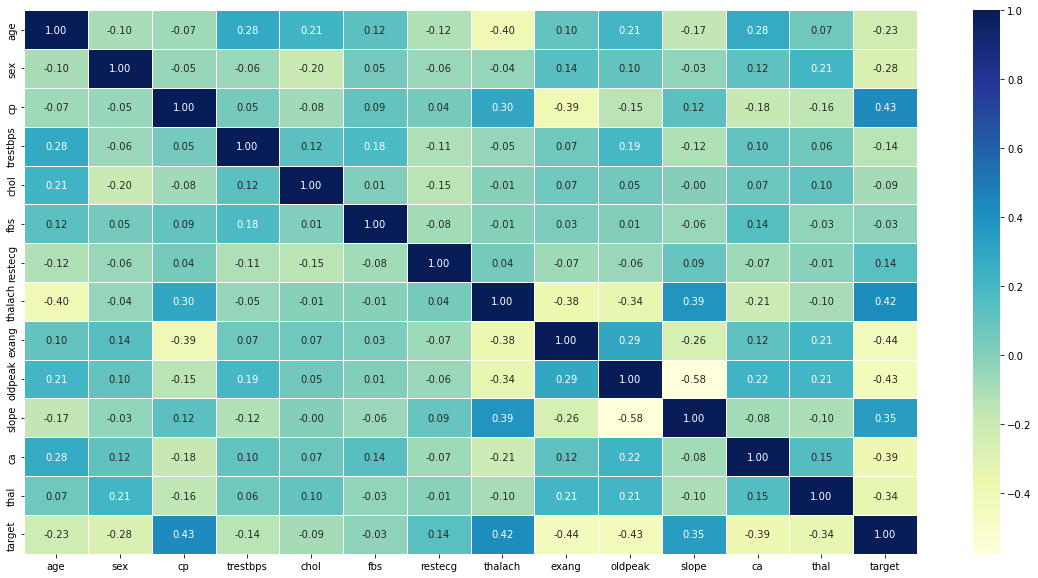

In [26]:
correlation_m = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(correlation_m,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

**Modeling of the data**

**Create the features and labels**

In [27]:
x = df.drop("target", axis=1)
y = df["target"]

**Now, let's split the data**

In [28]:
# create the seed
np.random.seed(42)

# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

**We have splitted the data**

* training set can be used for the training the model
* testing set can be used for testing the trained model

**We're going to look different models**

1. Logistic Regression
2. KNeighbours Classifier
3. RandomForest Classifier

In [29]:
# create a dictionary 
models = {
    "Logistic Regression": LogisticRegression(),
    "Kneighbour Classifier": KNeighborsClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Linear SVC" : LinearSVC()
}

# now let's create a function
def model_fit_and_Score(model,x_train, y_train, x_test, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit Learn machine learning models 
    x-train : training data (no labels)
    x -test: testing data (no labels)
    y_train : training labels
    y_test : testing labels.
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_score = {}
    
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append to the dictionary
        model_score[name] = model.score(x_test,y_test)
    return model_score


In [30]:
modelscores = model_fit_and_Score(model=models,x_train=x_train, y_train=y_train,x_test=x_test,y_test=y_test)

modelscores

C:\py_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.8852459016393442,
 'Kneighbour Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'Linear SVC': 0.819672131147541}

**Model Comparison by using bar graph**

In [31]:
model_compare = pd.DataFrame(modelscores,index=["Accuracy"])

<AxesSubplot:>

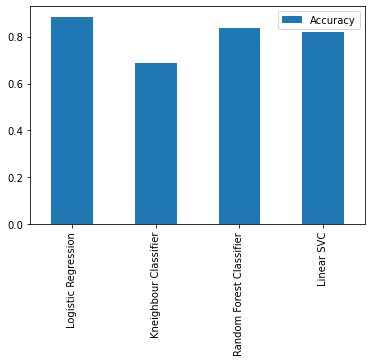

In [32]:
model_compare.T.plot.bar()

**WE've go the baseline model**

But we have to improve them more

What can we do?
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area Under the Curve


**Hyper Parameter TUning**

In [33]:
# KNN
training_scores = []

# parameters
n_neighbors = range(1,21)

# setup knn Instances
knn = KNeighborsClassifier()

#Loop through the parmas
for i in n_neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(x_train, y_train)
    print(i)
    training_scores.append(knn.score(x_test,y_test))
    print(knn.score(x_test,y_test))

1
0.6229508196721312
2
0.639344262295082
3
0.6557377049180327
4
0.6721311475409836
5
0.6885245901639344
6
0.7213114754098361
7
0.7049180327868853
8
0.6885245901639344
9
0.6885245901639344
10
0.7049180327868853
11
0.7540983606557377
12
0.7377049180327869
13
0.7377049180327869
14
0.7377049180327869
15
0.6885245901639344
16
0.7213114754098361
17
0.6885245901639344
18
0.6885245901639344
19
0.7049180327868853
20
0.6557377049180327


The maximum training score is 75.41%


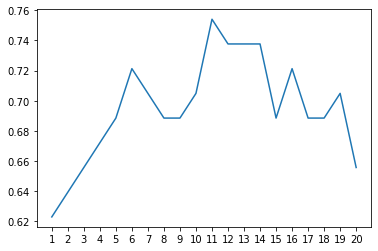

In [34]:
plt.plot(n_neighbors, training_scores)
plt.xticks(np.arange(1,21,1))
print(f"The maximum training score is {max(training_scores) * 100:.2f}%")

**HYperParameters using RandomizedSearchCV**

We're going to tune:

* LogisiticRegression()
* RandomForestClassifier()
* LinearSVC()

In [35]:
# create a hyperparameter for the logisiticRegression()

log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

# Random FOrest Classifier

rand_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth" : [None,3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

# Linear SVC

lin_svc_grid = {
    'C' : [1.0,2.0,3.0,4.0],
    'dual':[True,False],
    'loss' : ['hinge','squared_hinge'], 
    'penalty' : ['l1','l2'], 
    'multi_class' : ['ovr','crammer_singer'],
    'fit_intercept' : [True, False],
}

**Now we've successfully created the parameters for randomized search cv**



Lets now tune it 

In [36]:
# Tune LogisticRegression
np.random.seed(42)

#setup randomsearch 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit the data
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
# Check the best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

**Let's tune the RandomForestClassifier**

In [39]:
# create the seed
np.random.seed(42)

# create the randomsearchcv parameter
rs_rand_clf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rand_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit the data
rs_rand_clf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rand_clf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rand_clf.score(x_test,y_test)

0.8688524590163934

**Let's Tune the LinearSVC**

In [42]:
# create the random seed
np.random.seed(42)

# create the randomizedSearchcv 
rs_lin_svc = RandomizedSearchCV(LinearSVC(),
                               param_distributions=lin_svc_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit the data
rs_lin_svc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\s

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l1', 'l2']},
                   verbose=True)

In [43]:
rs_lin_svc.best_params_

{'penalty': 'l1',
 'multi_class': 'ovr',
 'loss': 'squared_hinge',
 'fit_intercept': True,
 'dual': False,
 'C': 3.0}

In [44]:
rs_lin_svc.score(x_test, y_test)

0.8688524590163934

**GridSearchCV**

**Let's tune with LogisticRegression**

In [45]:
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# fit the model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [47]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

**Let's tune with RandomForestClassifier**

In [48]:
rand_grid = {
    "n_estimators" : np.arange(210,1000,50),
    "max_depth" : [3,5,10],
    "min_samples_split" : np.arange(4,20,2),
    "min_samples_leaf" : [19]
}


np.random.seed(42)

gs_rf_clf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rand_grid,
                     cv=5,
                     verbose=True)

gs_rf_clf.fit(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [19],
                         'min_samples_split': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([210, 260, 310, 360, 410, 460, 510, 560, 610, 660, 710, 760, 810,
       860, 910, 960])},
             verbose=True)

In [49]:
gs_rf_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 18,
 'n_estimators': 710}

In [50]:
gs_rf_clf.score(x_test,y_test)

0.8688524590163934

**Let's tune with LinearSVC**

In [51]:
np.random.seed(42)

lin_svc_grid = {
    'C' : [1.0,2.0,3.0,4.0],
    'dual':[False],
    'loss' : ['hinge','squared_hinge'], 
    'penalty' : ['l1'], 
    'multi_class' : ['ovr'],
    'fit_intercept' : [True],
}

gs_lin_svc = GridSearchCV(LinearSVC(),
                         param_grid=lin_svc_grid,
                         cv=5,
                         verbose=True)

gs_lin_svc.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\m

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0], 'dual': [False],
                         'fit_intercept': [True],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr'], 'penalty': ['l1']},
             verbose=True)

In [52]:
gs_lin_svc.best_params_

{'C': 2.0,
 'dual': False,
 'fit_intercept': True,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

In [53]:
gs_lin_svc.score(x_test, y_test)

0.8852459016393442

**we have achived 88.5% accuracy both the model LogisticRegression and Linear SVC**

Evaluating our tuned Machine learning model beyiond accuracy

* Roc and AUC curve
* Confusion Matrix
* Classification report
* Precision 
* Recall
* F1 Score


In [55]:
logistic_preds = gs_log_reg.predict(x_test)

In [56]:
linear_svc_preds = gs_lin_svc.predict(x_test)

**Roc curve of logistic regression**

C:\py_ml\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


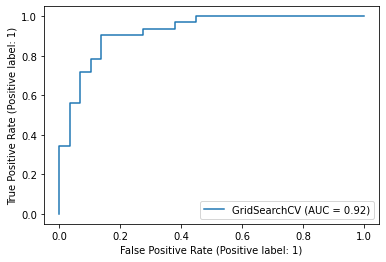

In [57]:
plot_roc_curve(gs_lin_svc,x_test,y_test)

**ROC Curve of LinearSVC**

C:\py_ml\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


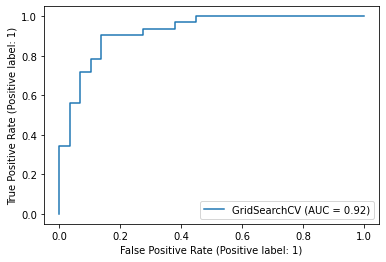

In [58]:
plot_roc_curve(gs_lin_svc, x_test, y_test)

**ROC curve of the logistic and linear svc is same**

**Let's see confusion matrix now**

**Logistic Regression**

In [59]:
print(confusion_matrix(y_test, logistic_preds))

[[25  4]
 [ 3 29]]


**LInear SVC**

In [60]:
print(confusion_matrix(y_test, linear_svc_preds))

[[25  4]
 [ 3 29]]


**PLot using the seaborn map**

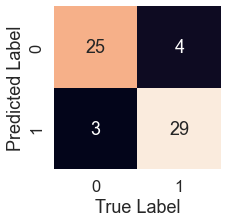

In [62]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    PLots nice looking confusion matrix using Seaborn's Library
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_matrix(y_test, logistic_preds)

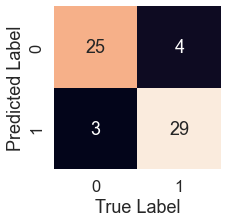

In [63]:
plot_conf_matrix(y_test, linear_svc_preds)

**Let's look into the classification report**

**Logistic Regression**

In [64]:
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Linear Svc**

In [65]:
print(classification_report(y_test, linear_svc_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculate Evaluation using Cross validation**

**Logistic Regression**

In [66]:
# by using bestparams
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [69]:
logistic_clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [71]:
# cross validation accuracy
logistic_Acc = cross_val_score(logistic_clf,x,y,cv=5,scoring="accuracy")

In [73]:
logistic_Acc = np.mean(logistic_Acc)
logistic_Acc

0.8479781420765027

In [112]:
# crossvalidaion precision
logistic_pre = cross_val_score(logistic_clf, x,y, cv=5, scoring="precision")
logistic_pre = np.mean(logisric_pre)
logistic_pre

0.8215873015873015

In [81]:
# crossvalidation recall
logistic_rec = cross_val_score(logistic_clf, x,y, cv=5, scoring="recall")
logistic_rec = np.mean(logistic_rec)
logistic_rec

0.9272727272727274

In [85]:
#cross validation f1score
logistic_f1 = cross_val_score(logistic_clf, x,y, cv=5, scoring="f1")
logistic_f1 = np.mean(logistic_f1)
logistic_f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross validation metrices'}>

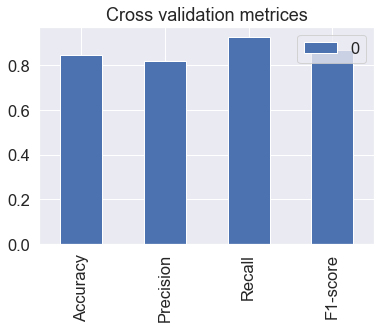

In [116]:
# create a graph of this classification report
cv_metrices = pd.DataFrame({"Accuracy" : logistic_Acc,
                           "Precision" : logistic_pre,
                           "Recall" : logistic_rec,
                           "F1-score" : logistic_f1},
                          index=[0])
cv_metrices.T.plot.bar(title="Cross validation metrices")

**LInear SVC**

In [118]:
# by using bestparams
gs_lin_svc.best_params_

{'C': 2.0,
 'dual': False,
 'fit_intercept': True,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

In [120]:
linearsvc_clf = LinearSVC(C=2.0,
                         dual=False,
                         fit_intercept=True,
                         loss='squared_hinge',
                         multi_class='ovr',
                         penalty='l1')

In [122]:
# cross validation accuracy
linearSVC_Acc = cross_val_score(linearsvc_clf,x,y,cv=5,scoring="accuracy")
linearSVC_Acc = np.mean(linearSVC_Acc)
linearSVC_Acc

C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8183060109289617

In [123]:
# crossvalidaion precision
linearSVC_pre = cross_val_score(linearsvc_clf, x,y, cv=5, scoring="precision")
linearSVC_pre = np.mean(linearSVC_pre)
linearSVC_pre

C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8075551286077601

In [125]:
# crossvalidation recall
linearSVC_rec = cross_val_score(linearsvc_clf, x,y, cv=5, scoring="recall")
linearSVC_rec = np.mean(linearSVC_rec)
linearSVC_rec

C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8787878787878787

In [126]:
#cross validation f1score
linearSVC_f1 = cross_val_score(linearsvc_clf, x,y, cv=5, scoring="f1")
linearSVC_f1 = np.mean(linearSVC_f1)
linearSVC_f1

C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8411373768457449

<AxesSubplot:title={'center':'Cross validation metrices'}>

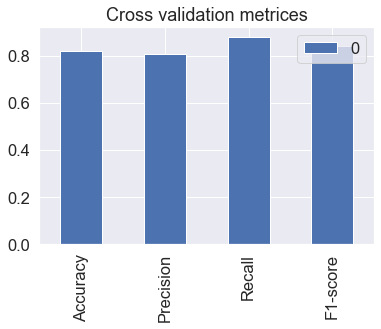

In [127]:
# create a graph of this classification report
linearSVC_cv_metrices = pd.DataFrame({"Accuracy" : linearSVC_Acc,
                           "Precision" : linearSVC_pre,
                           "Recall" : linearSVC_rec,
                           "F1-score" : linearSVC_f1},
                          index=[0])
linearSVC_cv_metrices.T.plot.bar(title="Cross validation metrices")

# In the cross validation metrices 

Logistic Regression won over the Linear SVC algorithm 🥳🥳🥳🥳🥳🥳

**Feature Importance**

In [133]:
logistic_clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')
logistic_clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [134]:
logistic_clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

**match coef value to the columns**

In [135]:
feature_dict = dict(zip(df.columns,list(logistic_clf.coef_[0])))

In [136]:
feature_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

In [139]:
features = pd.DataFrame(feature_dict,index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

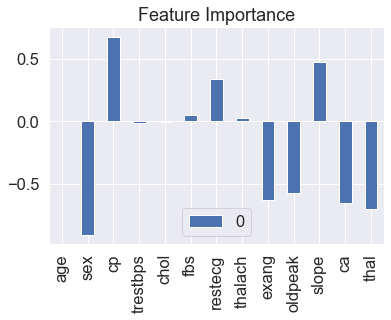

In [142]:
features.T.plot.bar(title="Feature Importance")

**Removing the column which shows negative value in coef_**

In [146]:
temp = df.drop(["age","sex","exang","oldpeak","ca","thal"],axis=1)
y = df["target"]

In [165]:
np.random.seed(42)
temp_train , temp_test , y_train, y_test = train_test_split(temp,y,test_size=0.2)

In [166]:
logistic_clf.fit(temp_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [167]:
logistic_clf.score(temp_test, y_test)

1.0

In [168]:
temp_preds = logistic_clf.predict(temp_test)

In [169]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [171]:
model_fit_and_Score(model=models,x_train=temp_train,y_train=y_train,x_test=temp_test,y_test=y_test)

C:\py_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\py_ml\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 1.0,
 'Kneighbour Classifier': 0.6557377049180327,
 'Random Forest Classifier': 1.0,
 'Linear SVC': 0.9672131147540983}